In [1]:
## #importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
import seaborn as sns

In [2]:
#loading and check data data
store_dataset=pd.read_csv('C:\\Users\\User\\Documents\\data_analysis_challenge_data.csv')

In [3]:
print(type(store_dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
store_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 1.9+ MB


In [5]:
print(store_dataset.shape)

(26985, 9)


In [6]:
print(store_dataset.shape[0])

26985


In [7]:
print(store_dataset.shape[1])

9


In [8]:
store_dataset.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94)
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT


In [9]:
#Data overview
print(f"Rows     : {store_dataset.shape[0]}")
print(f"Columns  : {store_dataset.shape[1]}" ,)
print()

Rows     : 26985
Columns  : 9



In [10]:
# Print the column names
print(f"Features : {store_dataset.columns.tolist()}")
print()


Features : ['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE', 'PRICE', 'GRP']



In [11]:
# Print the total number of null values in the data
print(f"Missing values :  {store_dataset.isnull().sum().values.sum()}")

Missing values :  0


In [12]:
# For each column, print the number of unique values
print(f"Unique values :  {store_dataset.nunique()}")

Unique values :  MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
dtype: int64


In [13]:
#Descriptive statistics for continuous variables 
store_dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
DAY,26985.0,15.167019,8.956057,1.0,7.0,14.0,23.0,31.0
BILL_AMT,26985.0,278.754206,541.398504,0.0,40.0,111.0,280.0,7292.0
QTY,26985.0,4.105021,95.666947,0.5,1.0,1.0,2.0,12000.0
VALUE,26985.0,67.808551,118.005978,0.0,10.0,30.0,80.0,3150.0
PRICE,26985.0,52.812982,84.987730,0.0,10.0,22.0,64.0,3150.0


In [14]:
#correlation
corr = store_dataset.corr()
print(type(corr))
print(corr)

<class 'pandas.core.frame.DataFrame'>
               DAY  BILL_AMT       QTY     VALUE     PRICE
DAY       1.000000 -0.048808  0.008431 -0.027509 -0.021367
BILL_AMT -0.048808  1.000000  0.027484  0.460631  0.350307
QTY       0.008431  0.027484  1.000000  0.067245 -0.018326
VALUE    -0.027509  0.460631  0.067245  1.000000  0.791834
PRICE    -0.021367  0.350307 -0.018326  0.791834  1.000000


In [15]:
store_new=store_dataset

In [16]:
print(store_new)

      MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0        M1        N1    4    T375     225.0  1.0  225.0  225.0   
1        M1        N1    4    T379      95.0  1.0   95.0   95.0   
2        M1        N1    4    T381      10.0  1.0   10.0   10.0   
3        M1        N1    4    T382     108.0  1.0  108.0  108.0   
4        M1        N1    4    T384      19.0  1.0   19.0   19.0   
...     ...       ...  ...     ...       ...  ...    ...    ...   
26980    M3       N10   31   T5999      10.0  1.0   10.0   10.0   
26981    M3       N10   31   T6007      88.0  1.0   10.0   10.0   
26982    M3       N10   31   T6007      88.0  2.0   20.0   10.0   
26983    M3       N10   31   T6007      88.0  1.0   58.0   58.0   
26984    M3       N10   31   T6013      15.0  1.0   15.0   15.0   

                              GRP  
0            BUTTER MARGR  (4/94)  
1         CONFECTIONERY - ECLAIRS  
2                       CHOCOLATE  
3                    PACKAGED TEA  
4              

In [17]:
##  Sales by store – Calculate the total sales amount made by each store over the 
##   entire three months and visualize with a plot of your choice.

store_new1=store_new[['STORECODE', 'VALUE']]

In [18]:
store_new1=store_new1.groupby('STORECODE').sum('VALUE')

In [19]:
print(store_new1)

               VALUE
STORECODE           
N1         144206.93
N10        142433.00
N2         221355.00
N3         125528.79
N4         206874.99
N5         238057.00
N6         110187.00
N7         273787.15
N8         116466.86
N9         250917.03


<AxesSubplot:xlabel='STORECODE'>

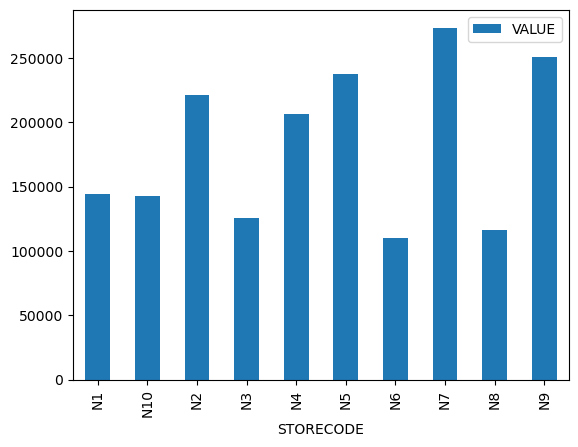

In [20]:
store_new1.plot.bar()

In [21]:
## 2.	Sales by category – For each store, find the category of products that’s sold the most (qty) a
##  nd visualize with a plot of 

store_new1=store_new[store_new["STORECODE"]=='N1']

In [22]:
## For the first Store 

store_new2=store_new1[['GRP', 'QTY']]

In [23]:
store_new2=store_new2.groupby('GRP').sum('QTY')

In [24]:
print(store_new2)

                               QTY
GRP                               
AGARBATTI & DHOOPBATTI        15.0
ALL AIR FRESHNERS(01/03)       3.0
ALL IODISED SALT              56.0
ANTACIDS                      24.0
ANTISEPTIC LIQUIDS (4/97)      1.0
...                            ...
TOOTH PASTES                  51.0
TWIN BLADES                    5.0
VANASPATI CONS PACK (8/94)  1019.0
VERMICELLI & NOODLE          518.0
WASHING POWDERS/LIQUIDS      209.0

[68 rows x 1 columns]


In [25]:
store_new2.sort_values(by=['QTY'],inplace=True,ascending=False)
df=store_new2.head()

<AxesSubplot:xlabel='GRP'>

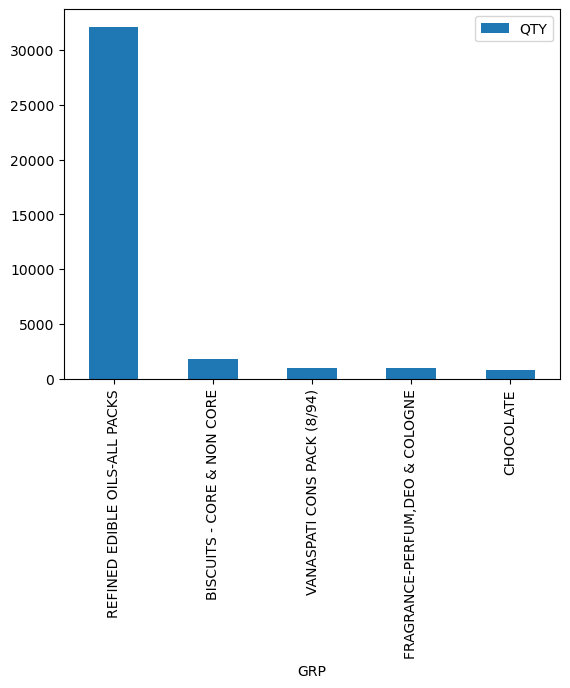

In [26]:
df.plot.bar()

                            QTY
GRP                            
AGARBATTI & DHOOPBATTI     20.0
ALL AIR FRESHNERS(01/03)   24.0
ALL IODISED SALT            4.0
ANTACIDS                    3.0
ANTISEPTIC LIQUIDS (4/97)   1.0
...                         ...
TOOTH BRUSH   (7/93)        5.0
TOOTH PASTES               22.0
TOOTH POWDERS               6.0
VERMICELLI & NOODLE        38.0
WASHING POWDERS/LIQUIDS    83.0

[62 rows x 1 columns]
                                  QTY
GRP                                  
CLEANERS - TOILET              8027.0
REFINED EDIBLE OILS-ALL PACKS  3057.0
PACKAGED PURE GHEE             3021.0
CLEANERS - UTENSIL             2076.0
HOME INSECTICIDES CTG  (8/93)  2023.0


<AxesSubplot:xlabel='GRP'>

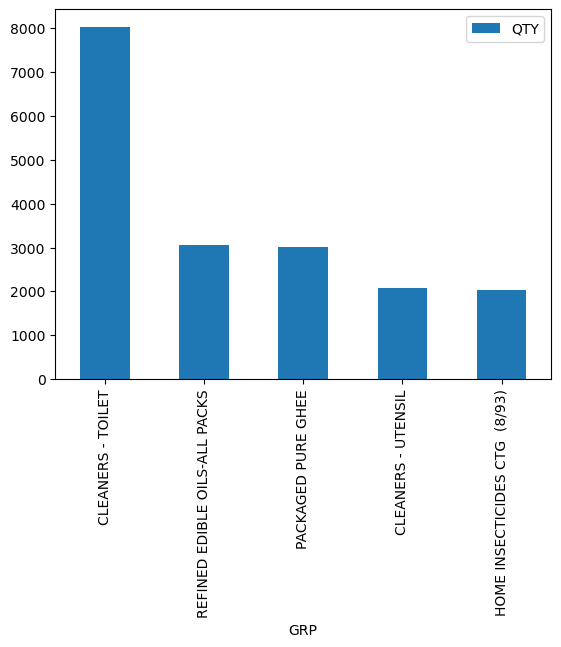

In [27]:
## For store N2 

store_N2=store_new[store_new["STORECODE"]=='N2']
store_N2=store_N2[['GRP', 'QTY']]
store_N2=store_N2.groupby('GRP').sum('QTY')
print(store_N2)
store_N2.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N2.head())
store_N2.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N2=store_N2.head()
df_N2.plot.bar()

                              QTY
GRP                              
AGARBATTI & DHOOPBATTI        7.0
ALL AIR FRESHNERS(01/03)      8.0
ALL IODISED SALT             45.0
ANTACIDS                     10.0
ANTISEPTIC LIQUIDS (4/97)    10.0
...                           ...
TOOTH PASTES                 46.0
TWIN BLADES                   2.0
VANASPATI CONS PACK (8/94)   22.0
VERMICELLI & NOODLE         218.0
WASHING POWDERS/LIQUIDS     169.0

[61 rows x 1 columns]
                              QTY
GRP                              
BISCUITS - CORE & NON CORE  803.0
VERMICELLI & NOODLE         218.0
SALTY SNACKS (2/97)         208.0
WASHING POWDERS/LIQUIDS     169.0
CHOCOLATE                   137.0


<AxesSubplot:xlabel='GRP'>

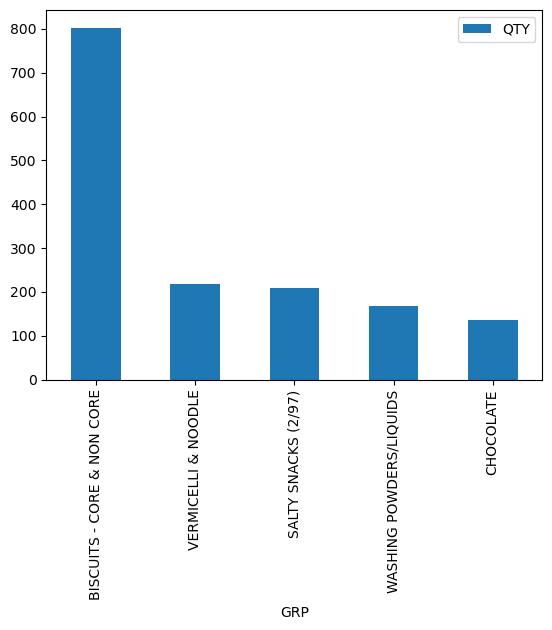

In [28]:
## For store N3

store_N3=store_new[store_new["STORECODE"]=='N3']
store_N3=store_N3[['GRP', 'QTY']]
store_N3=store_N3.groupby('GRP').sum('QTY')
print(store_N3)
store_N3.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N3.head())
store_N3.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N3=store_N3.head()
df_N3.plot.bar()

                                   QTY
GRP                                   
AFTER SHAVE LOTIONS                1.0
AGARBATTI & DHOOPBATTI             6.0
ALL AIR FRESHNERS(01/03)          19.0
ALL IODISED SALT                  23.0
ANTACIDS                          10.0
ANTISEPTIC LIQUIDS (4/97)          6.0
BATTERIES                         30.0
BEVERAGES                         11.0
BISCUITS - CORE & NON CORE      2081.0
BLUES                              4.0
BREAKFAST CEREALS                  6.0
CHOCOLATE                        635.0
CHYAVANPRASH                       3.0
CLEANERS - FLOOR                  46.0
CLEANERS - GLASS                   4.0
CLEANERS - TOILET                 44.0
CLEANERS - UTENSIL               548.0
COCONUT OIL PKTYP (08/02)        109.0
COFFEE                             4.0
CONFECTIONERY - ECLAIRS           37.0
CONFECTIONERY - TOFFEE/HBC         6.0
DETERGENT CAKES/BARS             678.0
FRAGRANCE-PERFUM,DEO & COLOGNE     6.0
GLUCOSE POWDER & TABLET  

<AxesSubplot:xlabel='GRP'>

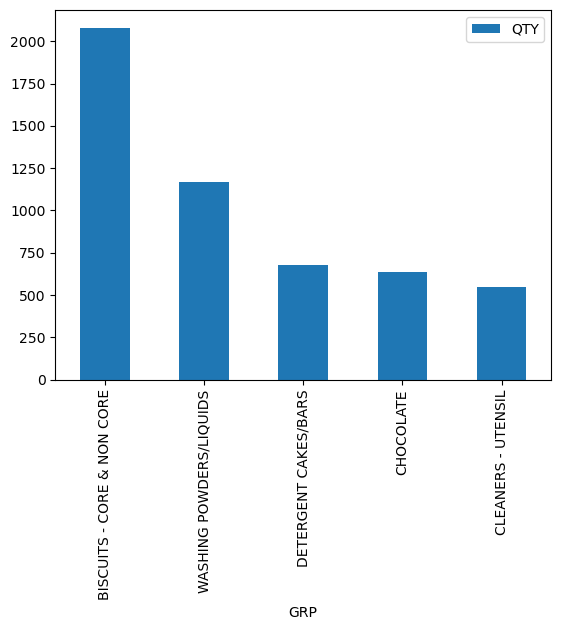

In [29]:
## For store N4 

store_N4=store_new[store_new["STORECODE"]=='N4']
store_N4=store_N4[['GRP', 'QTY']]
store_N4=store_N4.groupby('GRP').sum('QTY')
print(store_N4)
store_N4.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N4.head())
store_N4.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N4=store_N4.head()
df_N4.plot.bar()

                            QTY
GRP                            
AFTER SHAVE LOTIONS         1.0
AGARBATTI & DHOOPBATTI     31.0
ALL AIR FRESHNERS(01/03)   15.0
ALL IODISED SALT            8.0
ANTACIDS                   16.0
...                         ...
TOOTH PASTES              137.0
TOOTH POWDERS               6.0
TWIN BLADES                15.0
VERMICELLI & NOODLE       594.0
WASHING POWDERS/LIQUIDS   160.0

[73 rows x 1 columns]
                               QTY
GRP                               
BISCUITS - CORE & NON CORE  2691.0
VERMICELLI & NOODLE          594.0
CHOCOLATE                    530.0
SALTY SNACKS (2/97)          415.0
SHAMPOO - BY SEGMENTS        352.0


<AxesSubplot:xlabel='GRP'>

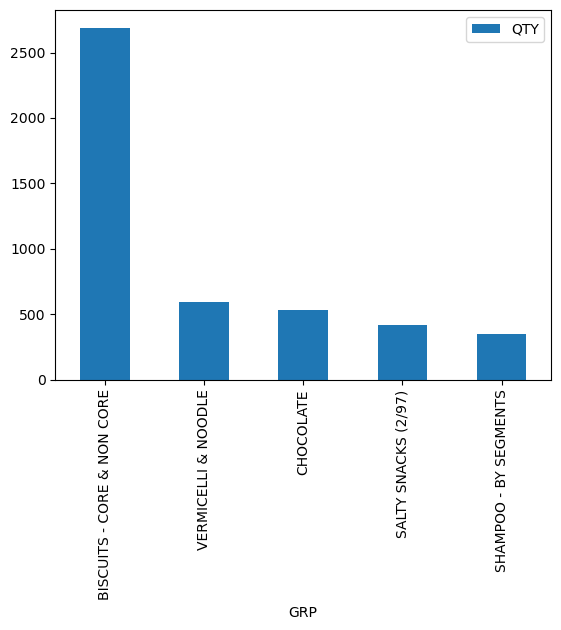

In [30]:
## For Store N5 

store_N5=store_new[store_new["STORECODE"]=='N5']
store_N5=store_N5[['GRP', 'QTY']]
store_N5=store_N5.groupby('GRP').sum('QTY')
print(store_N5)
store_N5.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N5.head())
store_N5.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N5=store_N5.head()
df_N5.plot.bar()

                                  QTY
GRP                                  
AGARBATTI & DHOOPBATTI            1.0
ALL AIR FRESHNERS(01/03)         15.0
ALL IODISED SALT                 24.0
ANTACIDS                         18.0
ANTISEPTIC LIQUIDS (4/97)        10.0
BEVERAGES                        12.0
BISCUITS - CORE & NON CORE      545.0
BREAKFAST CEREALS                11.0
BUTTER MARGR  (4/94)             79.0
CHEESE        (4/94)             40.0
CHOCOLATE                        74.0
CLEANERS - FLOOR                 22.0
CLEANERS - GLASS                  3.0
CLEANERS - TOILET                19.0
CLEANERS - UTENSIL               44.0
COCONUT OIL PKTYP (08/02)         6.0
COFFEE                           10.0
CONFECTIONERY - ECLAIRS           4.0
DETERGENT CAKES/BARS             12.0
DIAPERS       (8/93)              2.0
FRAGRANCE-PERFUM,DEO & COLOGNE    6.0
HAIR CONDITIONERS                14.0
HAIR DYES     (1/76)              7.0
HAIR OILS PKTP(8/02)              4.0
HOME INSECTI

<AxesSubplot:xlabel='GRP'>

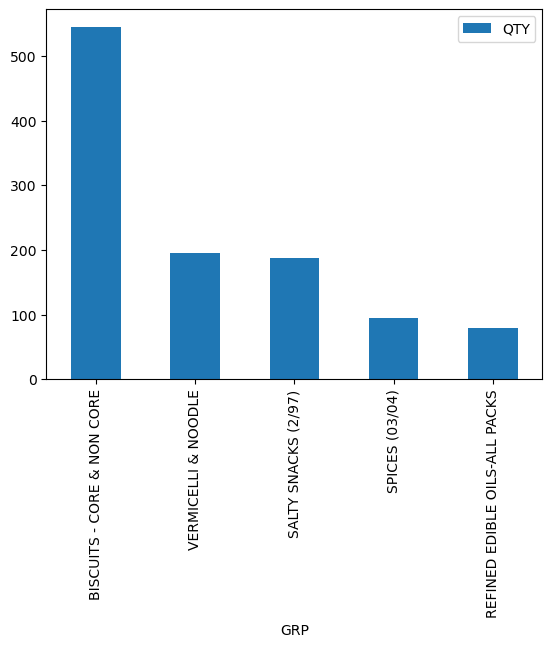

In [31]:
## For Store N6 

store_N6=store_new[store_new["STORECODE"]=='N6']
store_N6=store_N6[['GRP', 'QTY']]
store_N6=store_N6.groupby('GRP').sum('QTY')
print(store_N6)
store_N6.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N6.head())
store_N6.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N6=store_N6.head()
df_N6.plot.bar()

                              QTY
GRP                              
AGARBATTI & DHOOPBATTI       30.0
ALL AIR FRESHNERS(01/03)     33.0
ALL IODISED SALT            184.0
ANTACIDS                     22.0
ANTISEPTIC LIQUIDS (4/97)     9.0
...                           ...
TOOTH POWDERS                 3.0
TWIN BLADES                  12.0
VANASPATI CONS PACK (8/94)   20.0
VERMICELLI & NOODLE         453.0
WASHING POWDERS/LIQUIDS     529.0

[69 rows x 1 columns]
                                  QTY
GRP                                  
HAIR OILS PKTP(8/02)           6037.0
REFINED EDIBLE OILS-ALL PACKS  3403.0
BISCUITS - CORE & NON CORE     1894.0
SPICES (03/04)                  739.0
WASHING POWDERS/LIQUIDS         529.0


<AxesSubplot:xlabel='GRP'>

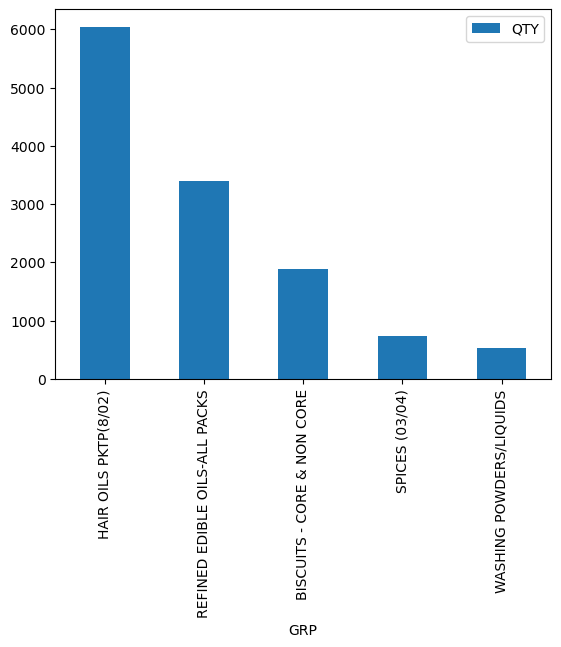

In [32]:
## For Store N7 

store_N7=store_new[store_new["STORECODE"]=='N7']
store_N7=store_N7[['GRP', 'QTY']]
store_N7=store_N7.groupby('GRP').sum('QTY')
print(store_N7)
store_N7.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N7.head())
store_N7.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N7=store_N7.head()
df_N7.plot.bar()

                              QTY
GRP                              
AFTER SHAVE LOTIONS           1.0
AGARBATTI & DHOOPBATTI       22.0
ALL AIR FRESHNERS(01/03)     14.0
ALL IODISED SALT             28.0
ANTACIDS                      5.0
...                           ...
TOOTH PASTES                 10.0
TWIN BLADES                   1.0
VANASPATI CONS PACK (8/94)    7.0
VERMICELLI & NOODLE         168.0
WASHING POWDERS/LIQUIDS     105.0

[62 rows x 1 columns]
                               QTY
GRP                               
BISCUITS - CORE & NON CORE  1009.0
PACKAGED PURE GHEE           177.0
VERMICELLI & NOODLE          168.0
SALTY SNACKS (2/97)          163.0
SPICES (03/04)               114.0


<AxesSubplot:xlabel='GRP'>

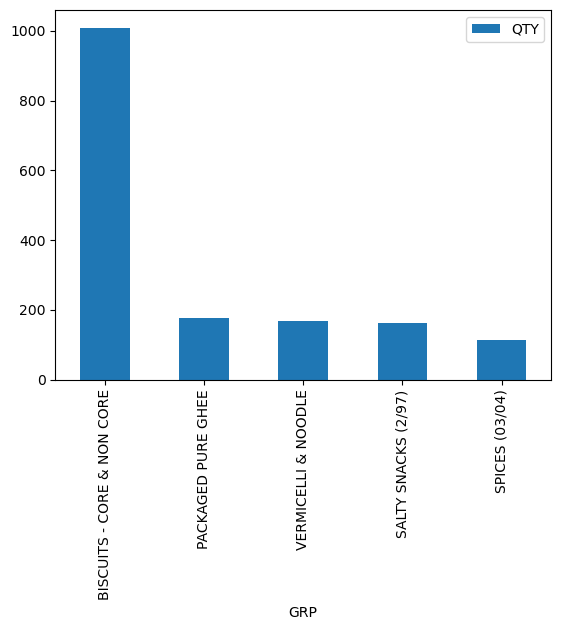

In [33]:
## For Store N8
store_N8=store_new[store_new["STORECODE"]=='N8']
store_N8=store_N8[['GRP', 'QTY']]
store_N8=store_N8.groupby('GRP').sum('QTY')
print(store_N8)
store_N8.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N8.head())
store_N8.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N8=store_N8.head()
df_N8.plot.bar()

                                  QTY
GRP                                  
AGARBATTI & DHOOPBATTI           17.0
ALL AIR FRESHNERS(01/03)         11.0
ALL IODISED SALT                 71.0
ANTACIDS                          1.0
ANTISEPTIC LIQUIDS (4/97)        16.0
BATTERIES                        35.0
BEVERAGES                         8.0
BISCUITS - CORE & NON CORE      395.0
BLUES                             2.0
BREAKFAST CEREALS                18.0
BUTTER MARGR  (4/94)             93.0
CHEESE        (4/94)             66.0
CHOCOLATE                        17.0
CLEANERS - FLOOR                 55.0
CLEANERS - GLASS                  9.0
CLEANERS - TOILET                64.0
CLEANERS - UTENSIL              104.0
COCONUT OIL PKTYP (08/02)        21.0
COFFEE                           18.0
CONFECTIONERY - ECLAIRS           1.0
CONFECTIONERY - TOFFEE/HBC        2.0
DETERGENT CAKES/BARS            104.0
DIGESTIVES                        1.0
FRAGRANCE-PERFUM,DEO & COLOGNE    1.0
GLUCOSE POWD

<AxesSubplot:xlabel='GRP'>

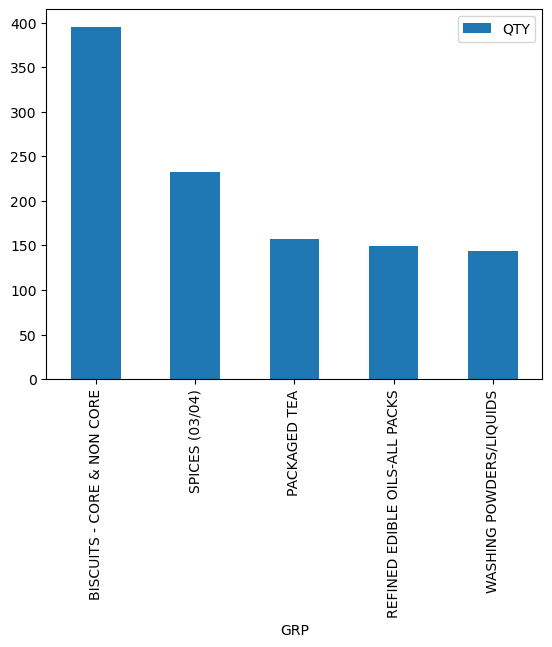

In [34]:
## For Store N9 

store_N9=store_new[store_new["STORECODE"]=='N9']
store_N9=store_N9[['GRP', 'QTY']]
store_N9=store_N9.groupby('GRP').sum('QTY')
print(store_N9)
store_N9.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N9.head())
store_N9.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N9=store_N9.head()
df_N9.plot.bar()

                                   QTY
GRP                                   
AGARBATTI & DHOOPBATTI            24.0
ALL IODISED SALT                 109.0
ANTACIDS                          25.0
BATTERIES                         10.0
BEVERAGES                         33.0
BISCUITS - CORE & NON CORE      1333.0
BREAKFAST CEREALS                 66.0
BUTTER MARGR  (4/94)             109.0
CHEESE        (4/94)              47.0
CHOCOLATE                        491.0
CLEANERS - FLOOR                  19.0
CLEANERS - GLASS                   1.0
CLEANERS - TOILET                  4.0
CLEANERS - UTENSIL                35.0
COCONUT OIL PKTYP (08/02)          4.0
COFFEE                             9.0
CONFECTIONERY - ECLAIRS            1.0
CONFECTIONERY - TOFFEE/HBC         1.0
DETERGENT CAKES/BARS               7.0
HAIR OILS PKTP(8/02)               2.0
JAMS/JELLY/MARMALADES-CTG         11.0
KETCHUPS/SAUCES                   66.0
LIQUID TOILET SOAPS  (8/93)       13.0
MILK POWDERS             

<AxesSubplot:xlabel='GRP'>

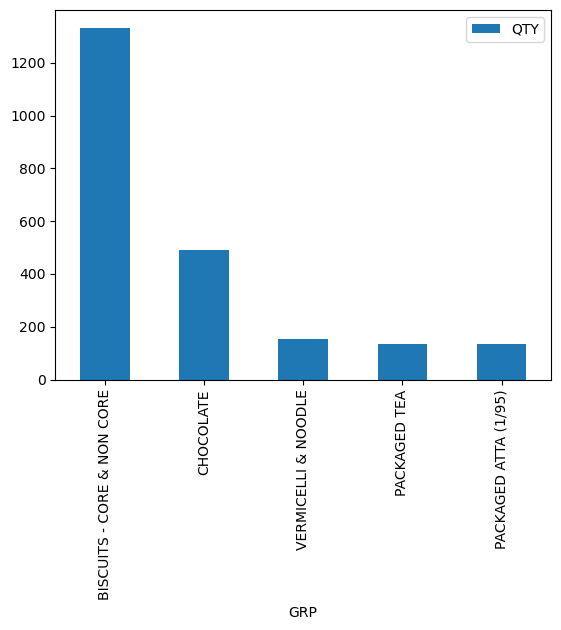

In [35]:
## For Store N10 

store_N10=store_new[store_new["STORECODE"]=='N10']
store_N10=store_N10[['GRP', 'QTY']]
store_N10=store_N10.groupby('GRP').sum('QTY')
print(store_N10)
store_N10.sort_values(by=['QTY'],inplace=True,ascending=False)
print(store_N10.head())
store_N10.sort_values(by=['QTY'],inplace=True,ascending=False)
df_N10=store_N10.head()
df_N10.plot.bar()

       VALUE
DAY         
1     661.24
2    4055.40
3    2251.80
4    8600.17
5    7232.80
6    7494.90
7    7462.90
8    5352.36
9    6623.40
10   4263.85
11   7324.20
12   5686.80
13   6710.90
14   6120.72
15   5637.30
16   5130.26
17   6286.12
18   1843.70
19   1392.80
20   4439.20
21   2537.90
22    612.00
23   1951.80
24    327.80
25   6579.80
26   4551.22
27   5397.40
28   3662.34
29   7522.95
30   5219.40
31   1273.50
       VALUE
DAY         
4    8600.17
29   7522.95
6    7494.90
7    7462.90
11   7324.20


<AxesSubplot:xlabel='DAY'>

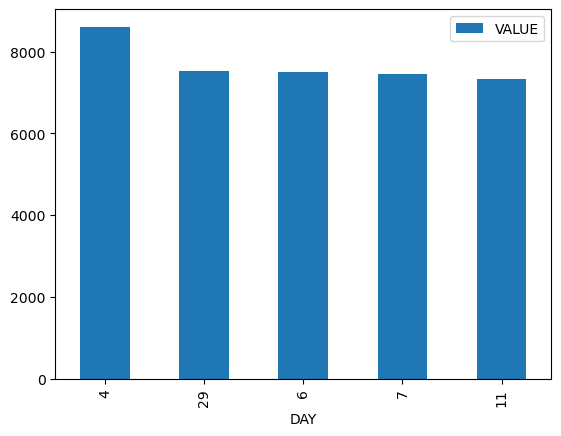

In [36]:
## 3.	Sales by day – For each store, find the day across all three months where the total sales amount is the highest. In other words, find the best day for each store in 
## terms of sales amount and visualize with a plot of your choice.

store_N1_day=store_new[store_new["STORECODE"]=='N1']
store_N1_day=store_N1_day[['DAY', 'VALUE']]
store_N1_day=store_N1_day.groupby('DAY').sum('VALUE')
print(store_N1_day)
store_N1_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N1_day.head())
store_N1_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N1_day=store_N1_day.head()
df_N1_day.plot.bar()

       VALUE
DAY         
1    12813.0
2     8999.0
3    15540.0
4    10181.0
5    10581.0
6    11106.0
7     1843.0
8     3923.0
9     6587.0
10    5883.0
11    2120.0
12    7358.0
13    5089.0
14    3694.0
15   11249.0
16    4975.0
17   10013.0
18    7013.0
19    3439.0
20     530.0
21    5340.0
22   14898.0
24    7111.0
25   10932.0
26    5193.0
27   14921.0
28    4570.0
29    5069.0
30    2036.0
31    8349.0
       VALUE
DAY         
3    15540.0
27   14921.0
22   14898.0
1    12813.0
15   11249.0
       VALUE
DAY         
1    4898.00
2     695.00
3    8695.00
4    4292.00
5    5999.00
6     237.00
7     649.00
8    1756.00
9    3325.00
10   2593.00
11   8097.00
12   3976.00
13   5531.00
14   1289.00
15   7876.00
16   5481.00
17   7804.00
18   3426.00
19   3168.00
20   6260.00
21   5640.00
22   1625.29
24   4014.00
25   3459.50
26    751.00
27   3687.00
28   6062.00
29   8295.00
30   3639.00
31   2309.00
      VALUE
DAY        
3    8695.0
29   8295.0
11   8097.0
15   7876.0
17   

<AxesSubplot:xlabel='DAY'>

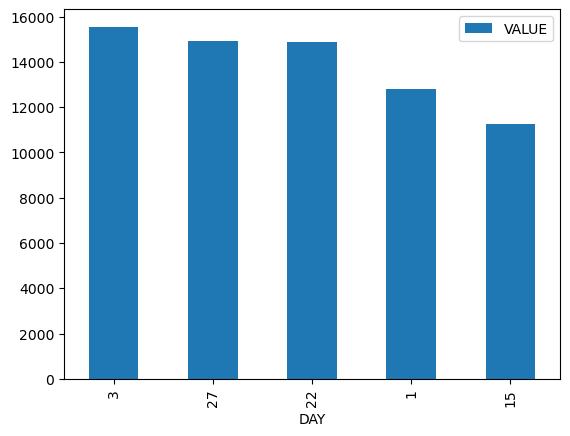

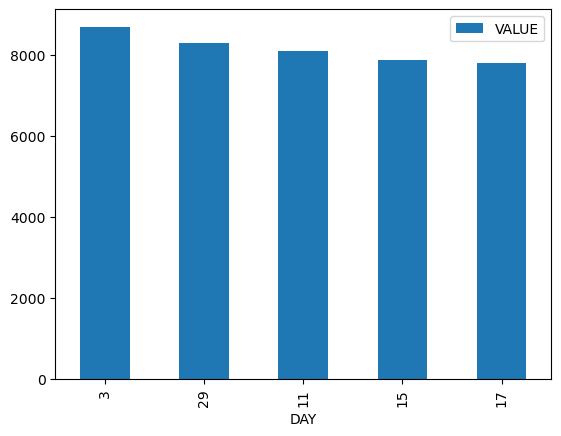

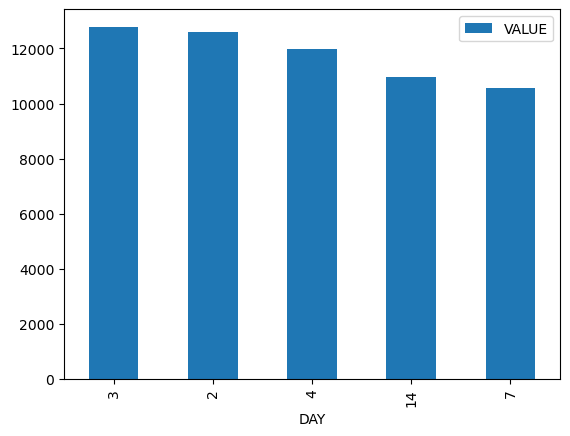

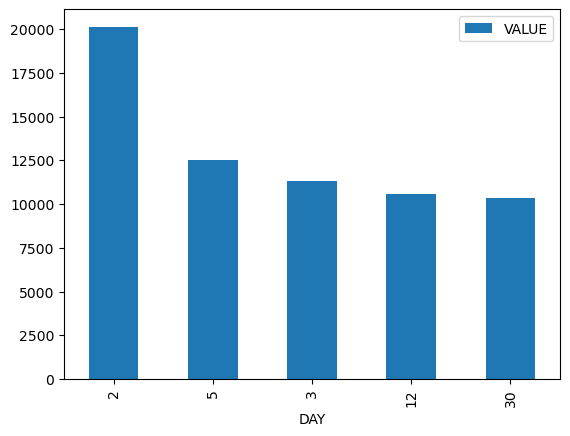

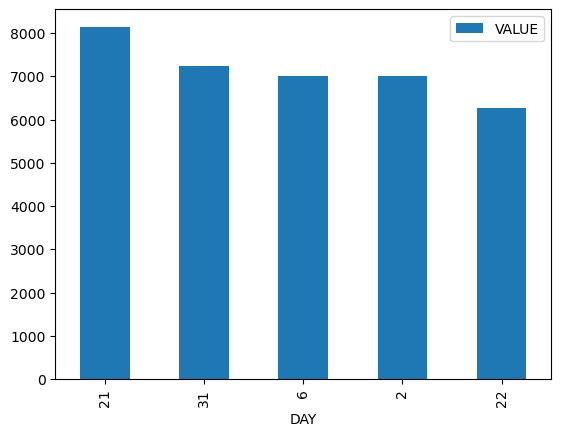

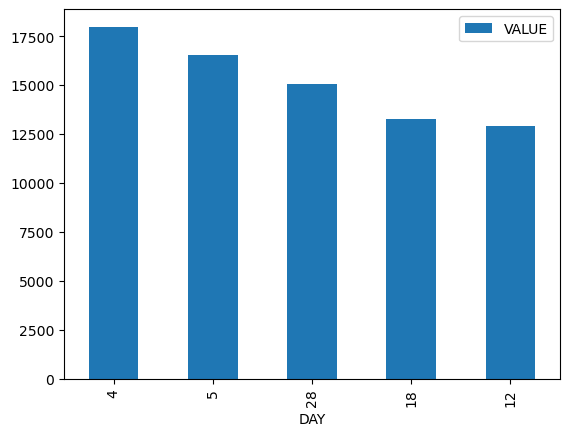

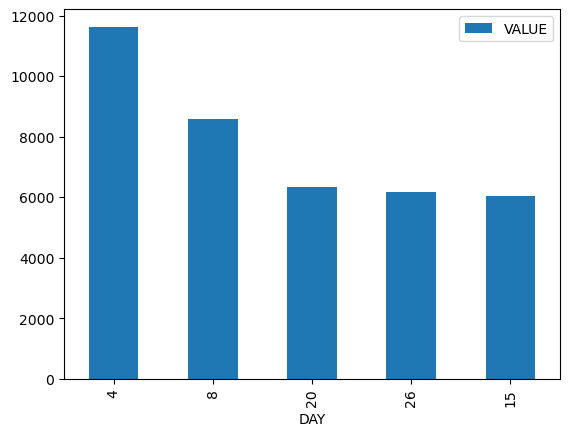

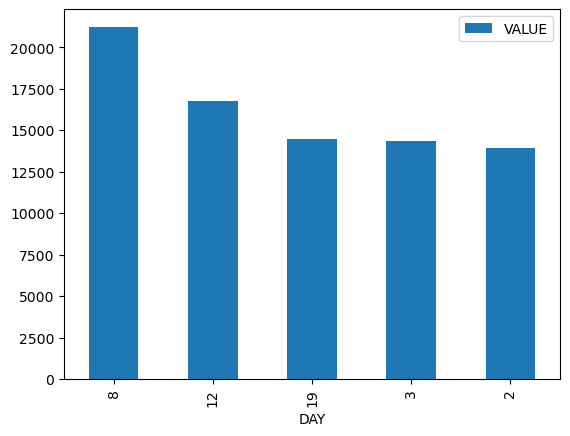

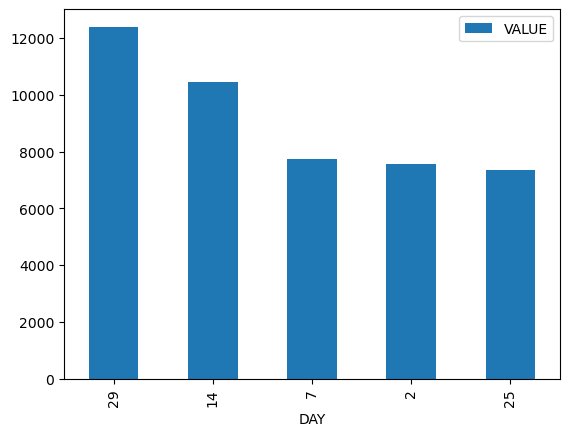

In [37]:
## For every Store 

store_N2_day=store_new[store_new["STORECODE"]=='N2']
store_N2_day=store_N2_day[['DAY', 'VALUE']]
store_N2_day=store_N2_day.groupby('DAY').sum('VALUE')
print(store_N2_day)
store_N2_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N2_day.head())
store_N2_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N2_day=store_N2_day.head()
df_N2_day.plot.bar()

store_N3_day=store_new[store_new["STORECODE"]=='N3']
store_N3_day=store_N3_day[['DAY', 'VALUE']]
store_N3_day=store_N3_day.groupby('DAY').sum('VALUE')
print(store_N3_day)
store_N3_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N3_day.head())
store_N3_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N3_day=store_N3_day.head()
df_N3_day.plot.bar()


store_N4_day=store_new[store_new["STORECODE"]=='N4']
store_N4_day=store_N4_day[['DAY', 'VALUE']]
store_N4_day=store_N4_day.groupby('DAY').sum('VALUE')
print(store_N4_day)
store_N4_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N4_day.head())
store_N4_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N4_day=store_N4_day.head()
df_N4_day.plot.bar()

store_N5_day=store_new[store_new["STORECODE"]=='N5']
store_N5_day=store_N5_day[['DAY', 'VALUE']]
store_N5_day=store_N5_day.groupby('DAY').sum('VALUE')
print(store_N5_day)
store_N5_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N5_day.head())
store_N5_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N5_day=store_N5_day.head()
df_N5_day.plot.bar()


store_N6_day=store_new[store_new["STORECODE"]=='N6']
store_N6_day=store_N6_day[['DAY', 'VALUE']]
store_N6_day=store_N6_day.groupby('DAY').sum('VALUE')
print(store_N6_day)
store_N6_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N6_day.head())
store_N6_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N6_day=store_N6_day.head()
df_N6_day.plot.bar()

store_N7_day=store_new[store_new["STORECODE"]=='N7']
store_N7_day=store_N7_day[['DAY', 'VALUE']]
store_N7_day=store_N7_day.groupby('DAY').sum('VALUE')
print(store_N7_day)
store_N7_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N7_day.head())
store_N7_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N7_day=store_N7_day.head()
df_N7_day.plot.bar()


store_N8_day=store_new[store_new["STORECODE"]=='N8']
store_N8_day=store_N8_day[['DAY', 'VALUE']]
store_N8_day=store_N8_day.groupby('DAY').sum('VALUE')
print(store_N8_day)
store_N8_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N8_day.head())
store_N8_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N8_day=store_N8_day.head()
df_N8_day.plot.bar()

store_N9_day=store_new[store_new["STORECODE"]=='N9']
store_N9_day=store_N9_day[['DAY', 'VALUE']]
store_N9_day=store_N9_day.groupby('DAY').sum('VALUE')
print(store_N9_day)
store_N9_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N9_day.head())
store_N9_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N9_day=store_N9_day.head()
df_N9_day.plot.bar()

store_N10_day=store_new[store_new["STORECODE"]=='N10']
store_N10_day=store_N10_day[['DAY', 'VALUE']]
store_N10_day=store_N10_day.groupby('DAY').sum('VALUE')
print(store_N10_day)
store_N10_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
print(store_N10_day.head())
store_N10_day.sort_values(by=['VALUE'],inplace=True,ascending=False)
df_N10_day=store_N10_day.head()
df_N10_day.plot.bar()

           VALUE
MONTH           
M1     552545.32
M2     667850.67
M3     609417.76


<AxesSubplot:xlabel='MONTH'>

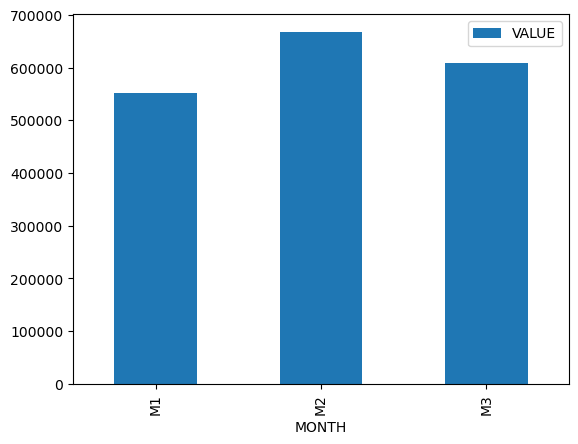

In [38]:
## Bonus:

## Sales by month – Calculate total sales amount across all stores per month to find the best 
## month across the given three months and visualize with a plot of your choice.


store_month=store_new[['MONTH', 'VALUE']]
store_month=store_month.groupby('MONTH').sum('VALUE')
print(store_month)
store_month.plot.bar()